


# DEPARTAMENTO ANALÍTICO - Y.Afisha!

# Introdução

Esse projeto tem objetivo de explorar Logs do servidor com dados sobre os acessos a Y.Afisha de janeiro de 2017 até dezembro de 2018, arquivo de despejo (ou dump file, em inglês) com todos os pedidos feitos durante o período e estatísticas de despesas com marketing. E tem como objetivo final ajudar a empresa a otimizar suas despesas com marketing.



## Dicionário de dados

Há três DataFrames que iremos trabalhar:

- `visits` (os logs do servidor com dados sobre os acessos ao site):
    - `'Uid'`: identificador unívoco do usuário
    - `'Device'`: dispositivo do usuário
    - `'Start Ts'`: data e hora do início da sessão
    - `'End Ts'`: data e hora do final da sessão
    - `'Source Id'`: identificador da origem do anúncio através do qual o usuário chegou

- `orders` (dados sobre os pedidos):
    - `'Uid'`: identificador unívoco do usuário que faz um pedido
    - `'Buy Ts'`: data e hora do pedido
    - `'Revenue'`: a receita da Y.Afisha com o pedido
    
- `costs` (dados sobre as despesas com marketing):
    - `'source_id'`: identificador da origem de anúncio
    - `'dt'`: data
    - `'costs'`: despesas com esta origem de anúncio neste dia

## Importando as Bibliotecas:

In [129]:
import pandas as pd
from scipy import stats as st
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt

## Etapa 1. Carregando os dados:

In [130]:
df_visits = pd.read_csv('visits_log_us.csv')
df_orders = pd.read_csv('orders_log_us.csv')
df_costs = pd.read_csv('costs_us.csv')

### DataFrame `Visits`

In [131]:
df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [132]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


### DataFrame `Orders`

In [133]:
df_orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [134]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


### DataFrame `Costs`

In [135]:
df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [136]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


## Etapa 2. Preparação de dados

-	Verificação e correção os tipos de dados


## Corrigindo os dados:

### DataFrame `Visits`

**Removendo dados duplicados e conferindo dados ausentes no DataFrame:**

In [137]:
df_visits.drop_duplicates(inplace=True)
print('o número de dados duplicados no Dataframe é de:', df_visits.duplicated().sum())
print()
print('o número de dados ausentes no Dataframe é de:', df_visits.isna().sum())

o número de dados duplicados no Dataframe é de: 0

o número de dados ausentes no Dataframe é de: Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64


**Consertando os títulos da colunas:**

In [138]:
df_visits.columns = df_visits.columns.str.lower()

In [139]:
df_visits.columns = df_visits.columns.str.replace(' ', '_')
df_visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


**Modificando o tipo de dado de data no DataFrame:**

In [140]:
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'])
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'])

**Criando as colunas de `semana`, `mês`, `dia` e `duração` para análises posteriores:**

In [141]:
df_visits['week'] = df_visits['start_ts'].dt.to_period('W')
df_visits['month'] = df_visits['start_ts'].dt.to_period('M')
df_visits['date'] = pd.to_datetime(df_visits['start_ts'].dt.date)
df_visits['duration'] = df_visits['end_ts'] - df_visits['start_ts']
df_visits['duration'] = df_visits['duration'].dt.seconds
df_visits.head()

,device,end_ts,source_id,start_ts,uid,week,month,date,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-18/2017-12-24,2017-12,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19/2018-02-25,2018-02,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-26/2017-07-02,2017-07,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-14/2018-05-20,2018-05,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-25/2017-12-31,2017-12,2017-12-27,0


### DataFrame `Orders`

**Removendo dados duplicados e conferindo dados ausentes no DataFrame:**

In [142]:
df_orders.drop_duplicates(inplace=True)
print('o número de dados duplicados no Dataframe é de: ', df_orders.duplicated().sum())
print()
print('o número de dados ausentes no Dataframe é de: ', df_orders.isna().sum())

o número de dados duplicados no Dataframe é de:  0

o número de dados ausentes no Dataframe é de:  Buy Ts     0
Revenue    0
Uid        0
dtype: int64


**Consertando os títulos da colunas:**

In [143]:
df_orders.columns = df_orders.columns.str.lower()

In [144]:
df_orders.columns = df_orders.columns.str.replace(' ', '_')
df_orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [145]:
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'])

### DataFrame `Costs`

In [146]:
df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


**Removendo dados duplicados e conferindo dados ausentes no DataFrame:**

In [147]:
df_costs.drop_duplicates(inplace=True)
print('o número de dados duplicados no Dataframe é de: ', df_costs.duplicated().sum())
print()
print('o número de dados ausentes no Dataframe é de: ', df_costs.isna().sum())

o número de dados duplicados no Dataframe é de:  0

o número de dados ausentes no Dataframe é de:  source_id    0
dt           0
costs        0
dtype: int64


**Modificando o tipo de dado de data no DataFrame:**

In [148]:
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

**Criando a coluna de `mês` para análises posteriores:**

In [149]:
df_costs['month'] = df_costs['dt'].dt.to_period('M')

## Etapa 3. Métricas

-	Produto
-   Vendas
-   Marketing


### Métricas de `Produto`

In [150]:
df_visits.head()

,device,end_ts,source_id,start_ts,uid,week,month,date,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-18/2017-12-24,2017-12,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19/2018-02-25,2018-02,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-26/2017-07-02,2017-07,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-14/2018-05-20,2018-05,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-25/2017-12-31,2017-12,2017-12-27,0


**Agrupando os acessos dos usuários ao produto por `dia`, `semana` e `mês`:**

In [151]:
visits_day = df_visits.groupby('date').agg({'uid' : 'nunique'})
visits_week = df_visits.groupby('week').agg({'uid' : 'nunique'})
visits_month = df_visits.groupby('month').agg({'uid' : 'nunique'})

**Plotando os agrupamentos `diariamente`, `semanalmente` e `mensalmente`:**

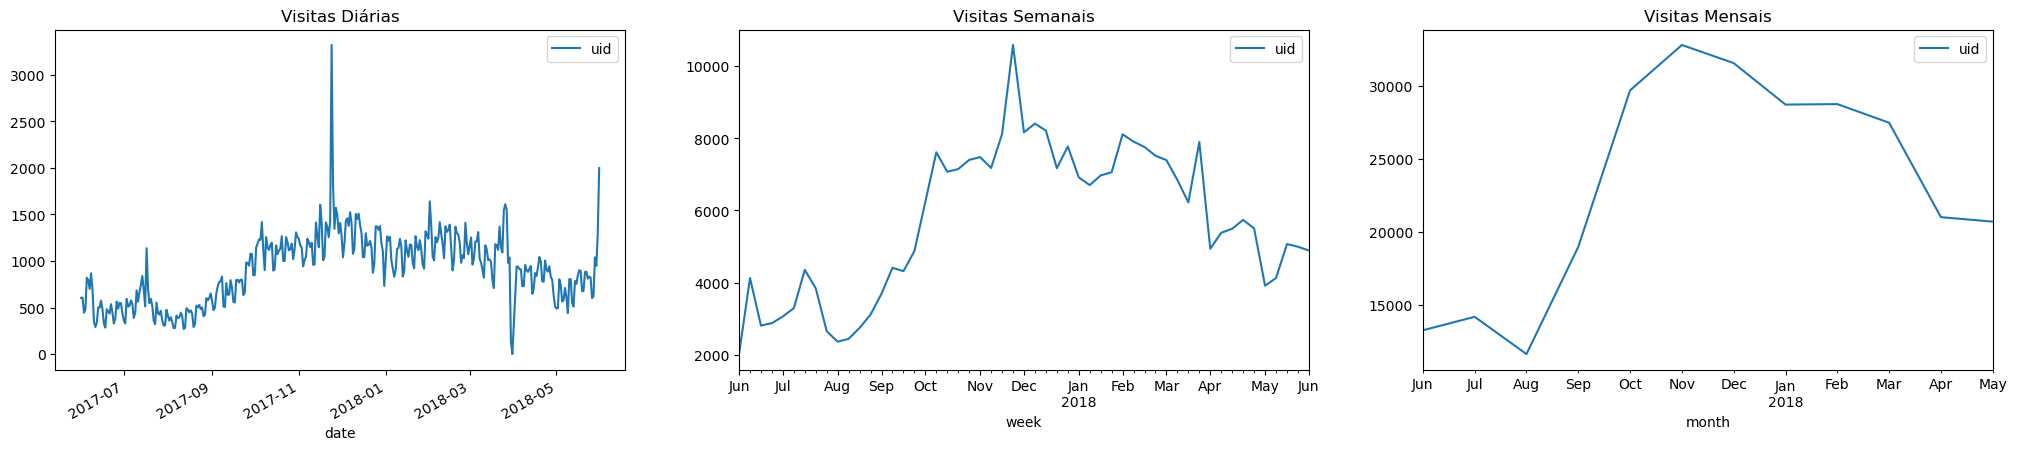

In [152]:
fig, ax = plt.subplots(1, 3, figsize = (25,5))
visits_day.plot(ax = ax[0])
ax[0].set_title('Visitas Diárias')
visits_week.plot(ax = ax[1])
ax[1].set_title('Visitas Semanais')
visits_month.plot(ax = ax[2])
ax[2].set_title('Visitas Mensais');

<span style="color:green;"> Como podemos obeservar, as visitas diárias são muito ruidosas e são suavizadas nos gráficos semanais e mensais. No gráficos acima podemos notar que houve um ápice de visitas no final do ano e acredito que por causa da sazonalidade as visitas foram menores durante outros períodos.</span>

**Número de `sessões` por dia:**

In [153]:
sessions_daily = df_visits.groupby('date').agg(num_users=('uid', 'count'))
sessions_daily

,num_users
date,
2017-06-01,664
2017-06-02,658
2017-06-03,477
2017-06-04,510
2017-06-05,893
...,...
2018-05-27,672
2018-05-28,1156
2018-05-29,1035


**Comprimento das `sessões`:**

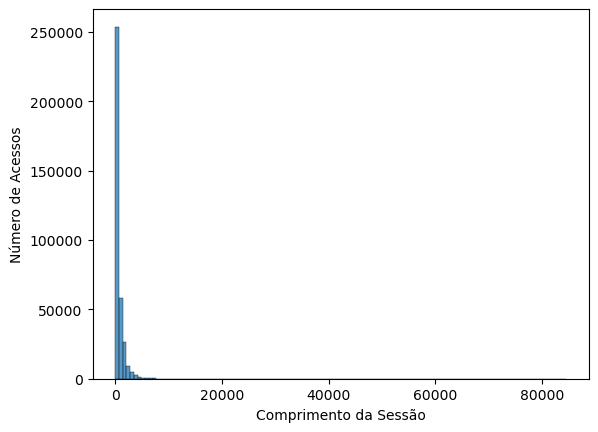

In [154]:
sns.histplot(df_visits['duration'], bins=120)
plt.xlabel('Comprimento da Sessão')
plt.ylabel('Número de Acessos');

<span style="color:green;"> Como podemos notar no gráfico acima, muito usuários acessam por um período curto de tempo e poucos usuários acessam por mais tempo. Uma investigação mais profunda sobre o porquê da grande maioria das sessões serem curtas seria necessária, mas poderíamos levantar as hipóteses de que há uma dificuldade do uso da plataforma pelos usuários ou quando os usuários acessam a plataforma, eles não encontraram o que querem pela desorganização do design, etc.</span>

**`Frequência` de uso do produto por parte dos usuários:**

In [155]:
sessions_per_user = df_visits.groupby('month').agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']

sessions_per_user['session_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])
sessions_per_user

,n_sessions,n_users,session_per_user
month,,,
2017-06,16505,13259,1.244815
2017-07,17828,14183,1.256998
2017-08,14355,11631,1.234202
2017-09,23907,18975,1.259921
2017-10,37903,29692,1.276539
2017-11,43969,32797,1.340641
2017-12,41983,31557,1.330386
2018-01,36939,28716,1.286356
2018-02,37182,28749,1.293332


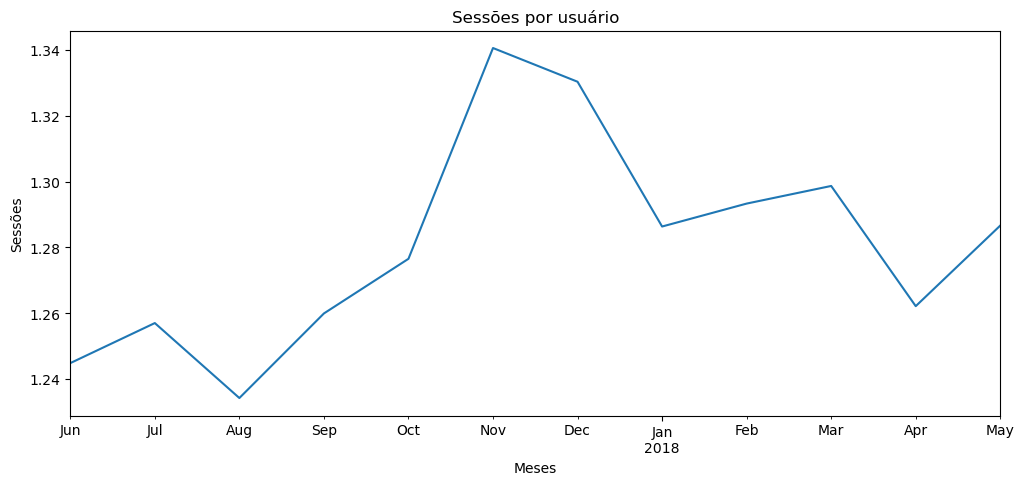

In [156]:
plt.figure(figsize= (12,5))
sessions_per_user['session_per_user'].plot().set(title = 'Sessões por usuário', xlabel = 'Meses', ylabel = 'Sessões');

<span style="color:green;">Como podemos observar no gráfico acima, temos mais de uma visita por usuário durante os meses, mostrando que há usuários que voltam a visitar o site no mesmo mês. Com destaque para o período entre Novembro e Dezembro.</span>

**Calculando a `Média`, `Mediana` e a `Moda`:**

In [157]:
print('A duração média da sessão é: {:.2f} seconds'.format(df_visits['duration'].mean())) 
print('A mediana da duração da sessão é: {:.2f} seconds'.format(df_visits['duration'].median()))
print('A moda da duração da sessão é: {} seconds'.format(df_visits['duration'].mode()[0]))

A duração média da sessão é: 643.51 seconds
A mediana da duração da sessão é: 300.00 seconds
A moda da duração da sessão é: 60 seconds


<span style="color:green;">Como podemos observar na análise acima:</span>
- A Média se encontra muito diferente da Mediana, o que infere que a amostra contém muitos dados atípicos (outliers).
- Podemos notar também que a duração de sessão mais comum na amostra é de 60 segundos, como mostra a Moda.

**Utilizando o `Boxplot` para enriquecimento da Análise:**

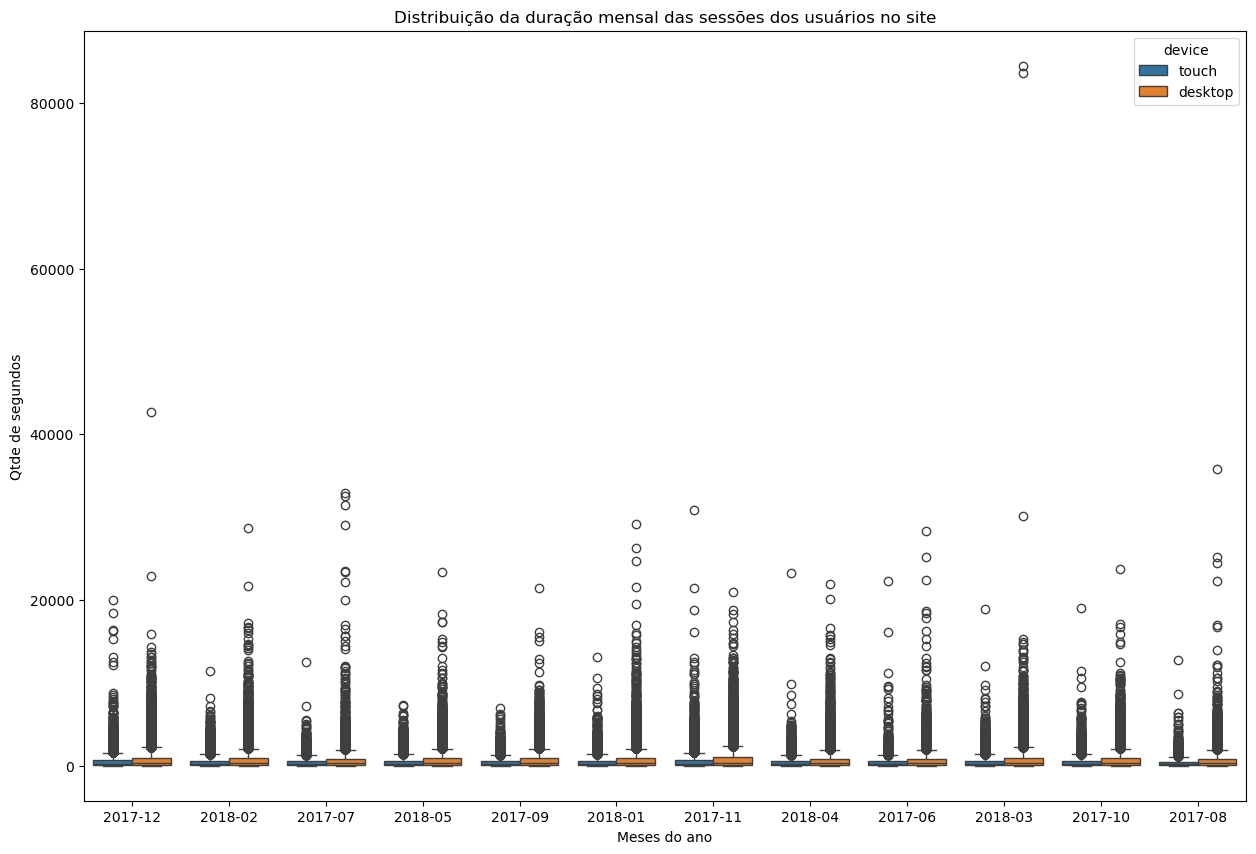

In [194]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_visits, x='month', y='duration', hue='device')
plt.title('Distribuição da duração mensal das sessões dos usuários no site')
plt.xlabel('Meses do ano')
plt.ylabel('Qtde de segundos');

<span style="color:green;">Como podemos notar no boxplot acima, tanto no device touch, quanto no device desktop encontramos muitos valores atípicos de duração da sessão dentro da amostra dos dados.</span>

### Métricas de `Vendas`

**Chamando os Dataframes:**

In [159]:
df_orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [160]:
df_visits.head()

,device,end_ts,source_id,start_ts,uid,week,month,date,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-18/2017-12-24,2017-12,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19/2018-02-25,2018-02,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-26/2017-07-02,2017-07,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-14/2018-05-20,2018-05,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-25/2017-12-31,2017-12,2017-12-27,0


**Agrupando o dataframe `visits` para encontrar o primeiro mês de visita dos usuários:**

In [161]:
firts_visits = df_visits.groupby('uid')['start_ts'].min().reset_index().rename(columns = {'start_ts': 'first_visit'})
firts_visits['first_visit_month'] = firts_visits['first_visit'].dt.to_period('M')
firts_visits

,uid,first_visit,first_visit_month
0,11863502262781,2018-03-01 17:27:00,2018-03
1,49537067089222,2018-02-06 15:55:00,2018-02
2,297729379853735,2017-06-07 18:47:00,2017-06
3,313578113262317,2017-09-18 22:49:00,2017-09
4,325320750514679,2017-09-30 14:29:00,2017-09
...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,2017-11
228165,18446424184725333426,2017-12-06 20:32:00,2017-12
228166,18446556406699109058,2018-01-01 16:29:00,2018-01
228167,18446621818809592527,2017-12-27 13:27:00,2017-12


**Fazendo o merge entre os dataframes `visits` e `orders`:**

In [162]:
merge_first_visit_order = pd.merge(firts_visits, df_orders, on='uid', how='inner')
merge_first_visit_order

,uid,first_visit,first_visit_month,buy_ts,revenue
0,313578113262317,2017-09-18 22:49:00,2017-09,2018-01-03 21:51:00,0.55
1,1575281904278712,2017-06-03 10:13:00,2017-06,2017-06-03 10:13:00,1.22
2,1575281904278712,2017-06-03 10:13:00,2017-06,2017-06-03 17:39:00,1.83
3,2429014661409475,2017-10-11 17:14:00,2017-10,2017-10-11 18:33:00,73.33
4,2464366381792757,2018-01-27 20:10:00,2018-01,2018-01-28 15:54:00,2.44
...,...,...,...,...,...
50410,18445407535914413204,2017-09-22 23:48:00,2017-09,2017-09-24 23:48:00,0.24
50411,18445407535914413204,2017-09-22 23:48:00,2017-09,2017-09-25 15:56:00,0.12
50412,18445601152732270159,2017-08-07 11:51:00,2017-08,2018-03-26 22:54:00,4.22
50413,18446156210226471712,2017-11-07 10:01:00,2017-11,2018-02-18 19:34:00,9.78


**Criando as `Coortes`:**

In [163]:
merge_first_visit_order['month'] = merge_first_visit_order['buy_ts'].dt.to_period('M')
merge_first_visit_order['month_int'] = merge_first_visit_order['month'].astype('int64')
merge_first_visit_order['first_visit_month_int'] = merge_first_visit_order['first_visit_month'].astype('int64')
merge_first_visit_order['coortes'] = merge_first_visit_order['month_int'] - merge_first_visit_order['first_visit_month_int']
merge_first_visit_order.head()

,uid,first_visit,first_visit_month,buy_ts,revenue,month,month_int,first_visit_month_int,coortes
0,313578113262317,2017-09-18 22:49:00,2017-09,2018-01-03 21:51:00,0.55,2018-01,576,572,4
1,1575281904278712,2017-06-03 10:13:00,2017-06,2017-06-03 10:13:00,1.22,2017-06,569,569,0
2,1575281904278712,2017-06-03 10:13:00,2017-06,2017-06-03 17:39:00,1.83,2017-06,569,569,0
3,2429014661409475,2017-10-11 17:14:00,2017-10,2017-10-11 18:33:00,73.33,2017-10,573,573,0
4,2464366381792757,2018-01-27 20:10:00,2018-01,2018-01-28 15:54:00,2.44,2018-01,576,576,0


**Agrupando dados para calcular a `Rentenção`:**

In [164]:
first_purchase = merge_first_visit_order.groupby(['uid', 'month', 'first_visit_month', 'coortes']).agg({'revenue' : 'sum'}).reset_index()
first_purchase

,uid,month,first_visit_month,coortes,revenue
0,313578113262317,2018-01,2017-09,4,0.55
1,1575281904278712,2017-06,2017-06,0,3.05
2,2429014661409475,2017-10,2017-10,0,73.33
3,2464366381792757,2018-01,2018-01,0,2.44
4,2551852515556206,2017-11,2017-11,0,10.99
...,...,...,...,...,...
41014,18445147675727495770,2017-11,2017-08,3,3.05
41015,18445407535914413204,2017-09,2017-09,0,0.88
41016,18445601152732270159,2018-03,2017-08,7,4.22
41017,18446156210226471712,2018-02,2017-11,3,9.78


**Tabela de `Rentenção`:**

In [165]:
retention_table = first_purchase.pivot_table(index= 'first_visit_month', columns='coortes', values='revenue', aggfunc='sum')
retention_table.fillna("")

coortes,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,9557.49,2664.58,1464.69,3882.09,3940.59,2824.48,3489.95,2270.81,2317.91,3481.64,2204.01,1927.81
2017-07,9874.89,1059.28,1108.9,982.96,846.99,798.08,588.0,770.3,724.52,591.03,467.16,
2017-08,6234.81,997.32,1001.35,946.21,810.04,532.9,486.65,1246.23,830.64,375.72,,
2017-09,12357.20,3700.48,2110.63,10438.93,1288.48,1910.05,966.84,491.38,418.57,,,
2017-10,18362.32,3809.83,1327.02,1058.05,1043.47,1022.19,578.91,655.9,,,,
2017-11,16531.79,2667.58,1342.85,1369.53,1108.74,707.63,698.6,,,,,
2017-12,16857.00,1739.03,4198.3,5123.82,1457.57,1782.13,,,,,,
2018-01,10597.01,1951.70,1164.76,305.88,527.47,,,,,,,
2018-02,11512.63,1984.46,663.19,901.01,,,,,,,,


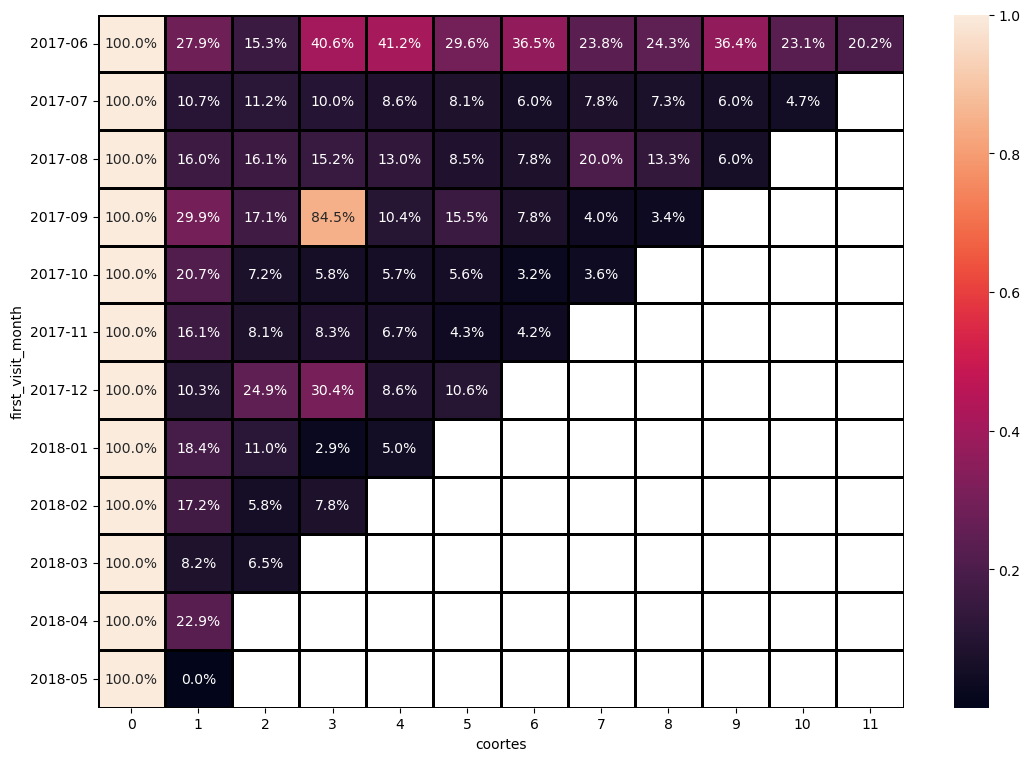

In [166]:
sales_rates = retention_table.copy()

for col in sales_rates.columns[1:]:
    sales_rates[col] = sales_rates[col] / sales_rates[0]
sales_rates[0] = sales_rates[0] / sales_rates[0]

fig, ax = plt.subplots(figsize = (13, 9))
sns.heatmap(sales_rates, annot = True, fmt = '.1%', linewidth = 1.0, linecolor = 'black');

<span style="color:green;">Como podemos notar no heatmap acima, a maioria da Coortes iniciaram o seu segundo mês com decréscimo na retenção de usuários, com destaque para a Coorte "2017-12" que teve um acréscimo na retenção dos usuários e também um destaque bastante atípico para a Coorte "2017-09" que após decréscimo no segundo mês, conseguiu atingir uma retenção de 84.5% no terceiro mês. Entretanto, o resultado geral de retenção do site foi bem ruim em todas as Coortes.</span>

**Agrupando dados para saber a `quantidade de pedidos`:**

In [167]:
quant_purchase = merge_first_visit_order.groupby(['month', 'first_visit_month', 'coortes']).agg({'uid' : 'count'}).reset_index()
quant_purchase

,month,first_visit_month,coortes,uid
0,2017-06,2017-06,0,2354
1,2017-07,2017-06,1,387
2,2017-07,2017-07,0,1976
3,2017-08,2017-06,2,273
4,2017-08,2017-07,1,184
...,...,...,...,...
74,2018-05,2018-02,3,139
75,2018-05,2018-03,2,201
76,2018-05,2018-04,1,339
77,2018-05,2018-05,0,2476


In [168]:
quant_purchase_table = quant_purchase.pivot_table(index= 'first_visit_month', columns='coortes', values='uid', aggfunc='sum')
quant_purchase_table.fillna('')

coortes,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,2354.0,387.0,273.0,442.0,516.0,428.0,500.0,329.0,371.0,318.0,185.0,294.0
2017-07,1976.0,184.0,204.0,196.0,192.0,170.0,142.0,156.0,151.0,87.0,87.0,
2017-08,1350.0,221.0,205.0,179.0,162.0,107.0,102.0,145.0,83.0,84.0,,
2017-09,2520.0,492.0,329.0,275.0,135.0,192.0,194.0,97.0,112.0,,,
2017-10,4270.0,619.0,356.0,235.0,245.0,219.0,131.0,158.0,,,,
2017-11,3912.0,766.0,369.0,317.0,304.0,140.0,175.0,,,,,
2017-12,3989.0,464.0,262.0,250.0,113.0,158.0,,,,,,
2018-01,2940.0,452.0,255.0,94.0,123.0,,,,,,,
2018-02,3184.0,413.0,130.0,139.0,,,,,,,,


<span style="color:green;">Nota-se na tabela acima que após o primeiro mês das Coortes, a quantidade de pedidos cai drasticamente a partir do segundo mês com uma leve variação na Coorte "2017-06" para cima e para baixo durante o período da mesma.</span>

**`Volume Médio` de uma compra:**

In [169]:
total_volum = df_orders['revenue'].sum()
total_purchase = df_orders['uid'].count()

avg_volum = total_volum / total_purchase
avg_volum.round()

5.0

<span style="color:green;">O volume médio de compra é de 5 dólares.</span>

**`LTV` - Life time value:**

In [170]:
df_orders['month'] = df_orders['buy_ts'].dt.to_period('M')
df_orders['month'].astype('datetime64[M]')
df_orders

,buy_ts,revenue,uid,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05


**Agrupando os dados para encontrar o `primeiro mês do pedido`:**

In [171]:
first_orders = df_orders.groupby('uid').agg({'month' : 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01
1,1575281904278712,2017-06
2,2429014661409475,2017-10
3,2464366381792757,2018-01
4,2551852515556206,2017-11


**Agrupando os dados para encontrar o `número de compradores`:**

In [172]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


**Fazendo a junção dos Dataframes `orders` e `first_orders`:**

In [173]:
merge_orders = pd.merge(df_orders, first_orders, on='uid')
merge_orders.head()

,buy_ts,revenue,uid,month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06


**Agrupando os dados para adicionar uma nova coluna de soma das `Receitas`:**

In [174]:
cohorts = merge_orders.groupby(['first_order_month','month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,month,revenue
0,2017-06,2017-06,9557.49
1,2017-06,2017-07,981.82
2,2017-06,2017-08,885.34
3,2017-06,2017-09,1931.30
4,2017-06,2017-10,2068.58


**Fazendo a junção de Dataframes para cálculos futuros:**

In [175]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report['month_int'] = report['month'].astype('int64')
report['first_order_month_int'] = report['first_order_month'].astype('int64')
report.head()

,first_order_month,n_buyers,month,revenue,month_int,first_order_month_int
0,2017-06,2023,2017-06,9557.49,569,569
1,2017-06,2023,2017-07,981.82,570,569
2,2017-06,2023,2017-08,885.34,571,569
3,2017-06,2023,2017-09,1931.30,572,569
4,2017-06,2023,2017-10,2068.58,573,569


**Calculando `LTV` com uma margem de 50% de lucro:**

In [176]:
margin_rate = 0.5
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['month_int'] - report['first_order_month_int'])
report['ltv'] = report['gp'] / report['n_buyers']
report.head()

,first_order_month,n_buyers,month,revenue,month_int,first_order_month_int,gp,age,ltv
0,2017-06,2023,2017-06,9557.49,569,569,4778.745,0,2.362207
1,2017-06,2023,2017-07,981.82,570,569,490.910,1,0.242664
2,2017-06,2023,2017-08,885.34,571,569,442.670,2,0.218819
3,2017-06,2023,2017-09,1931.30,572,569,965.650,3,0.477336
4,2017-06,2023,2017-10,2068.58,573,569,1034.290,4,0.511265


In [177]:
result = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean')
result.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,2.36,0.24,0.22,0.48,0.51,0.37,0.48,0.29,0.28,0.3,0.29,0.13
2017-07,3.01,0.17,0.31,0.18,0.09,0.08,0.06,0.07,0.08,0.07,0.08,
2017-08,2.64,0.24,0.23,0.2,0.25,0.14,0.11,0.2,0.15,0.09,,
2017-09,2.82,0.56,0.26,1.99,0.2,0.32,0.35,0.12,0.09,,,
2017-10,2.50,0.27,0.1,0.08,0.08,0.06,0.04,0.06,,,,
2017-11,2.58,0.2,0.1,0.16,0.07,0.03,0.06,,,,,
2017-12,2.37,0.13,0.46,0.53,0.16,0.17,,,,,,
2018-01,2.07,0.15,0.15,0.07,0.03,,,,,,,
2018-02,2.08,0.14,0.04,0.04,,,,,,,,


<span style="color:green;">Como podemos observar na tabela acima, o LTV (Life Time Value) mostra o quanto de dinheiro em média os usuários trazem para a empresa ao longo do tempo. Neste caso acima, estamos avaliando pelas Coortes dos meses. Veremos abaixo um exemplo mais concreto.</span>

**Isolando um `LTV` de uma `Coorte` e Calculando o `CAC` da mesma para análise:**

In [178]:
ltv_201706 = result.loc['2017-06'].sum()
ltv_201706

cohort_201706 = report[report['first_order_month'] == '2017-06']
costs_201706 = df_costs[df_costs['month'] == '2017-06']['costs'].sum()

n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706 = result.loc['2017-06'].sum()

print('CAC =', cac_201706)
print('LTV =', ltv_201706)

CAC = 8.905091448344043
LTV = 5.939616905585764


<span style="color:green;">Como podemos notar acima, o Custo médio de Aquisição do Cliente (CAC) foi maior que o dinheiro médio que o usuário trouxe para a empresa (LTV), ou seja, para cada 8,90 doláres investidos para trazer o usuário para o site, o mesmo só gastou 5,93 doláres. Então, o investimento feito não se pagou e gerou prejuízos.</span>

**Calculando os custos `mensais`:**

In [179]:
monthly_costs = df_costs.groupby('month')['costs'].sum().reset_index()
monthly_costs.head()

,month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88


**Fazendo a junção dos custos `mensais` com a tabela completa de cálculos visando encontrar o `ROIM`:**

In [180]:
merge_result_costs = pd.merge(report, monthly_costs, on='month')
merge_result_costs['cac'] = merge_result_costs['costs'] / merge_result_costs['n_buyers']
merge_result_costs

,first_order_month,n_buyers,month,revenue,month_int,first_order_month_int,gp,age,ltv,costs,cac
0,2017-06,2023,2017-06,9557.49,569,569,4778.745,0,2.362207,18015.00,8.905091
1,2017-06,2023,2017-07,981.82,570,569,490.910,1,0.242664,18240.59,9.016604
2,2017-07,1923,2017-07,11557.65,570,570,5778.825,0,3.005109,18240.59,9.485486
3,2017-06,2023,2017-08,885.34,571,569,442.670,2,0.218819,14790.54,7.311191
4,2017-07,1923,2017-08,644.61,571,570,322.305,1,0.167605,14790.54,7.691388
...,...,...,...,...,...,...,...,...,...,...,...
73,2018-01,3373,2018-05,211.48,580,576,105.740,4,0.031349,22224.27,6.588873
74,2018-02,3651,2018-05,270.70,580,577,135.350,3,0.037072,22224.27,6.087173
75,2018-03,3533,2018-05,1114.87,580,578,557.435,2,0.157780,22224.27,6.290481
76,2018-04,2276,2018-05,1209.92,580,579,604.960,1,0.265800,22224.27,9.764618


**Calculando o `ROIM`:**

In [181]:
merge_result_costs['romi'] = merge_result_costs['ltv'] / merge_result_costs['cac']
result_romi = merge_result_costs.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean')
result_romi.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.27,0.29,0.32,0.36,0.39,0.41,0.43,0.45,0.47,0.49,0.52,0.53
2017-07,0.32,0.34,0.36,0.37,0.38,0.38,0.38,0.39,0.39,0.4,0.41,
2017-08,0.24,0.26,0.27,0.27,0.28,0.29,0.29,0.3,0.31,0.32,,
2017-09,0.30,0.34,0.36,0.49,0.51,0.53,0.56,0.58,0.59,,,
2017-10,0.30,0.33,0.34,0.35,0.36,0.37,0.38,0.39,,,,
2017-11,0.28,0.3,0.31,0.33,0.34,0.35,0.36,,,,,
2017-12,0.27,0.29,0.35,0.43,0.46,0.49,,,,,,
2018-01,0.21,0.22,0.24,0.25,0.26,,,,,,,
2018-02,0.23,0.25,0.26,0.26,,,,,,,,


<span style="color:green;">Como podemos notar na tabela acima, nenhuma das Coortes conseguiu cobrir as despesas, uma vez que todas as mesmas se encontram com valores abaixo de 1. Então, nota-se novamente que o site está tendo prejuízo e é preciso mudar sua estratégia.</span>

### Métricas de `Marketing`

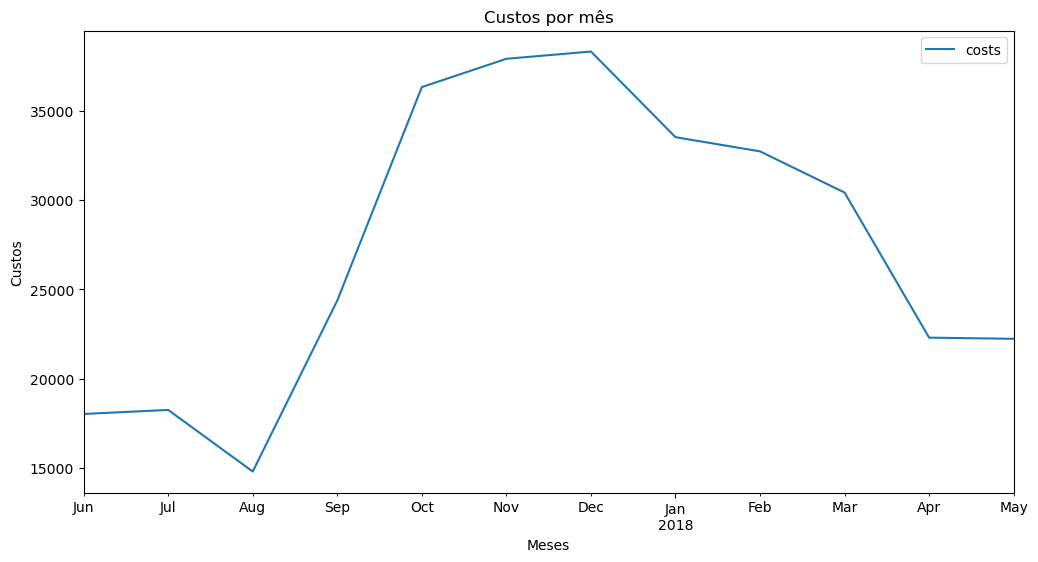

In [182]:
(df_costs.pivot_table(index='month', values='costs', aggfunc='sum').plot(figsize=(12,6), title='Custos por mês', xlabel = 'Meses', ylabel = 'Custos'))
plt.show()

<span style="color:green;">Pode-se notar no gráfico acima que os custos mensais se encontram altos a partir de setembro e decaindo a partir de janeiro. Uma interessante relação que podemos fazer com o número de visitas no site é que há um alto investimento em vários meses, porém o número de visitas (como já vimos em um gráfico nesta análise) não acompanha o investimento, somente em Novembro e Dezembro, porém o investimento começa a ser feito em Agosto e só começa a decair realmente em Março.</span>

**Plotando os custos por `fontes de acesso`:**

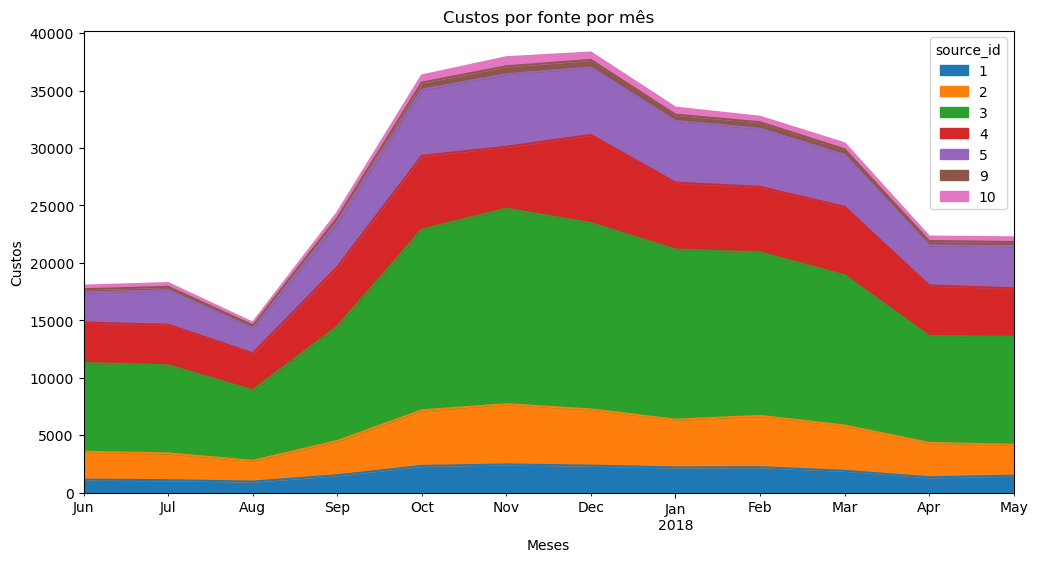

In [183]:
(df_costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')
      .plot.area(figsize=(12,6), title='Custos por fonte por mês', xlabel = 'Meses', ylabel = 'Custos'));
plt.show()

<span style="color:green;">Olhando o gráfico de área acima, podemos notar que há um alto investimento na fonte de acesso 3, equanto nas fonte 5, 4 e 2 seguem com investimentos semelhantes. É possível que o investimento nessas fontes de acesso não estão sendo monitorados corretamente e isso está fazendo com que o site desperdice dinheiro nas fontes erradas.</span>

**Agrupando os dados e adicionando a coluna `primeiro pedido`:**

In [184]:
df_orders['cohort'] = df_orders.groupby(['uid'])['month'].transform('min')
df_orders = df_orders.rename(columns = {'cohort': 'first_order_month'})
df_orders

,buy_ts,revenue,uid,month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05,2018-05
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05,2018-05
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05,2018-05
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05,2018-05


**Juntando os Dataframes `costs` e `orders` para calcular o `CAC` por mês:**

In [185]:
cac_per_month = pd.merge(df_costs.groupby('month').agg({'costs': 'sum'}), df_orders.groupby('first_order_month').agg({'uid': 'nunique'}), left_index=True, right_index=True)
cac_per_month

,costs,uid
2017-06,18015.00,2023
2017-07,18240.59,1923
2017-08,14790.54,1370
2017-09,24368.91,2581
2017-10,36322.88,4340
2017-11,37907.88,4081
2017-12,38315.35,4383
2018-01,33518.52,3373
2018-02,32723.03,3651
2018-03,30415.27,3533


**Calculando o `CAC` médio por mês:**

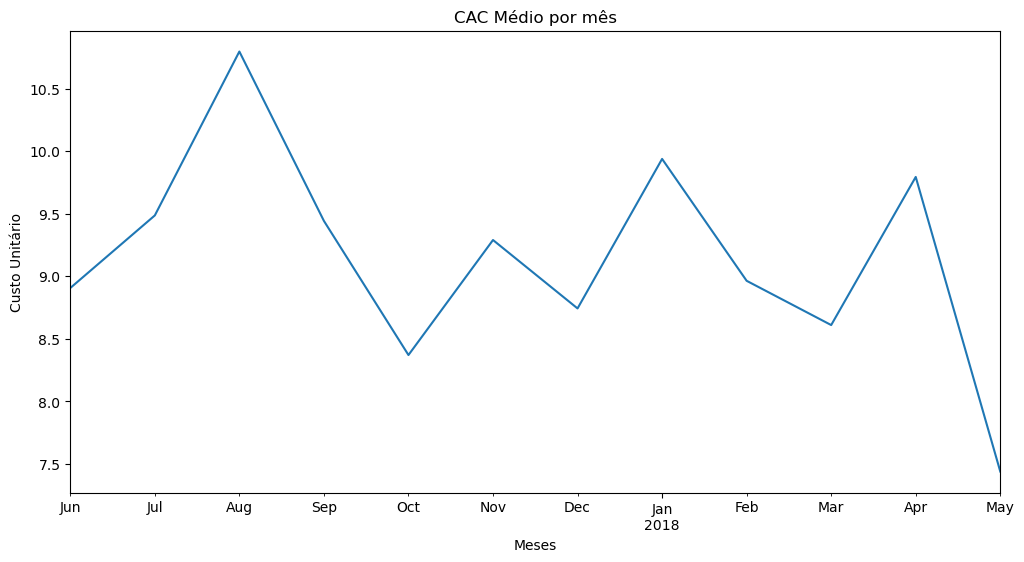

In [186]:
cac_per_month['cac'] = cac_per_month['costs'] / cac_per_month['uid']
cac_per_month['cac'].plot(figsize=(12,6), title='CAC Médio por mês', xlabel='Meses', ylabel='Custo Unitário');

<span style="color:green;">Podemos observar no gráfico acima que o Custo Médio de Aquisição Cliente (CAC) está muito alto em meses que não estão acontecendo muitas visitas no site, é necessário rever a estratégia de Marketing.</span>

**Juntando os Dataframes `orders` e `users`:**

In [187]:
users = df_visits.sort_values('start_ts').groupby('uid').first()
users = users[['source_id']]
orders = pd.merge(df_orders, users, left_on='uid', right_index=True)
orders

,buy_ts,revenue,uid,month,first_order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06,3
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05,2018-05,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05,2018-05,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05,2018-05,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05,2018-05,3


**Agrupando dados de `fonte de acesso` e `primeiro pedido`:**

In [188]:
buyers_daily = orders.groupby(['source_id', 'first_order_month']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_month'] = buyers_daily['first_order_month'].dt.to_timestamp()
buyers_daily

,source_id,first_order_month,n_buyers
0,1,2017-06-01,1143
1,1,2017-07-01,410
2,1,2017-08-01,238
3,1,2017-09-01,363
4,1,2017-10-01,504
...,...,...,...
81,10,2018-01-01,100
82,10,2018-02-01,142
83,10,2018-03-01,226
84,10,2018-04-01,112


**Juntando os Dataframes `buyers_daily` e `costs` para cálculo de `CAC por fonte`:**

In [189]:
costs = pd.merge(buyers_daily, df_costs, left_on=['source_id', 'first_order_month'], right_on=['source_id', 'dt'])
costs['cac'] = costs['costs'] / costs['n_buyers']
costs

,source_id,first_order_month,n_buyers,dt,costs,month,cac
0,1,2017-06-01,1143,2017-06-01,75.20,2017-06,0.065792
1,1,2017-07-01,410,2017-07-01,5.80,2017-07,0.014146
2,1,2017-08-01,238,2017-08-01,44.65,2017-08,0.187605
3,1,2017-09-01,363,2017-09-01,40.28,2017-09,0.110964
4,1,2017-10-01,504,2017-10-01,57.14,2017-10,0.113373
...,...,...,...,...,...,...,...
72,10,2017-12-01,90,2017-12-01,13.34,2017-12,0.148222
73,10,2018-01-01,100,2018-01-01,28.99,2018-01,0.289900
74,10,2018-02-01,142,2018-02-01,32.07,2018-02,0.225845
75,10,2018-03-01,226,2018-03-01,9.86,2018-03,0.043628


**Calculando `CAC por fonte e comprador`:**

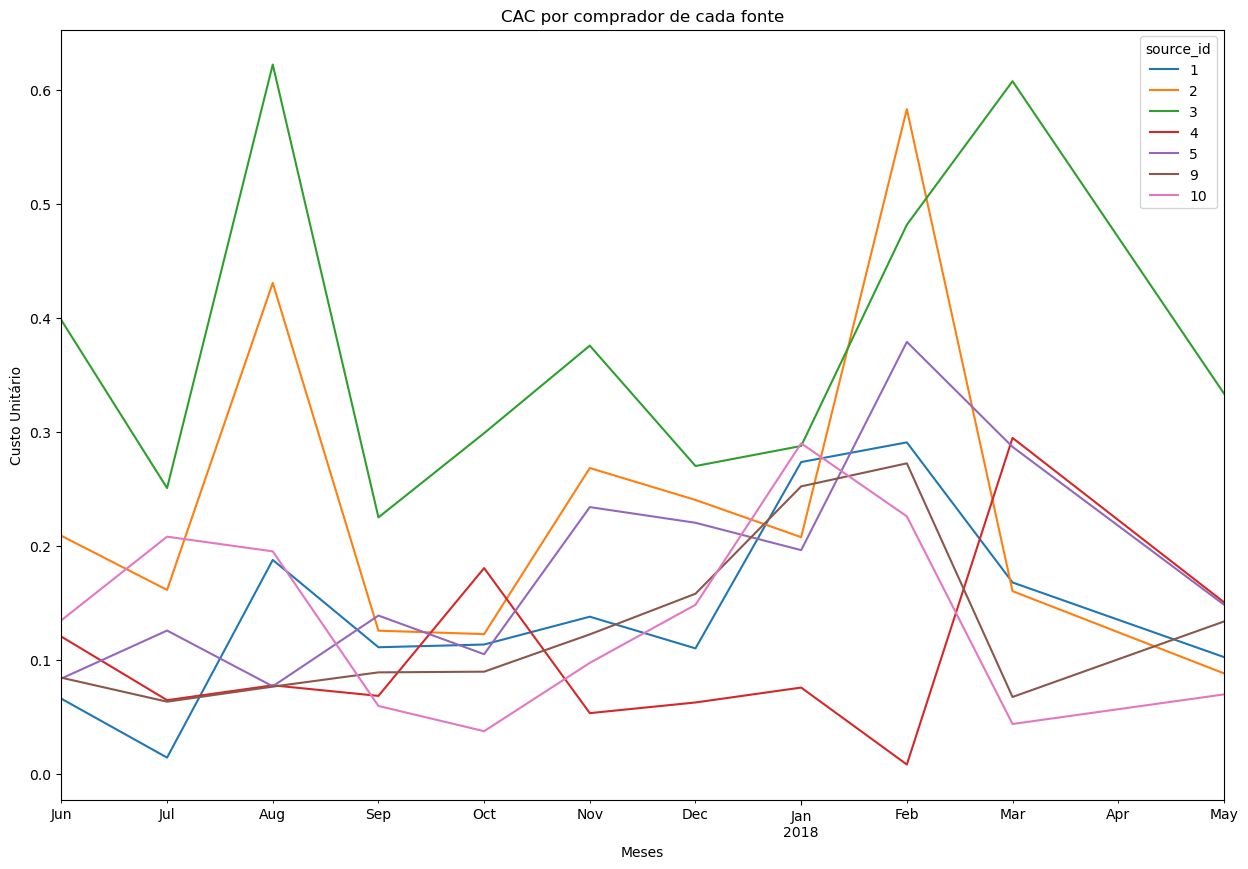

In [190]:
(costs.pivot_table(index=['month'], columns='source_id', values='cac', aggfunc='mean').plot(
    figsize=(15,10), title='CAC por comprador de cada fonte', xlabel='Meses', ylabel='Custo Unitário'));

<span style="color:green;">Como podemos notar no gráfico acima, o CAC por compradores das fontes 3 e 2 se destacam dentre os demais, uma vez que o investimento (como já foi mostrado no gráfico de custos neste exercício) está sendo muito alto e como foi demonstrado também, não está obtendo muito retorno.</span>

**Agrupando os dados para encontrar o `CAC` por `fonte de acesso`:**

In [191]:
cac_source = costs.groupby('source_id').agg({'cac': 'mean'}).round(2)
cac_source

,cac
source_id,
1,0.14
2,0.24
3,0.38
4,0.11
5,0.18
9,0.13
10,0.14


<span style="color:green;">Como podemos notar na tabela acima, 4 fontes de acesso se destacam no baixo custo de aquisição de cliente em relação as demais, são elas: 4, 9, 10 e 1.</span>

**Juntamos os Dataframes:**

In [192]:
romi_source = pd.merge(merge_result_costs, orders, on='first_order_month')
romi_source.head()

,first_order_month,n_buyers,month_x,revenue_x,month_int,first_order_month_int,gp,age,ltv,costs,cac,romi,buy_ts,revenue_y,uid,month_y,source_id
0,2017-06,2023,2017-06,9557.49,569,569,4778.745,0,2.362207,18015.0,8.905091,0.265265,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,1
1,2017-06,2023,2017-06,9557.49,569,569,4778.745,0,2.362207,18015.0,8.905091,0.265265,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2
2,2017-06,2023,2017-06,9557.49,569,569,4778.745,0,2.362207,18015.0,8.905091,0.265265,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2
3,2017-06,2023,2017-06,9557.49,569,569,4778.745,0,2.362207,18015.0,8.905091,0.265265,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2
4,2017-06,2023,2017-06,9557.49,569,569,4778.745,0,2.362207,18015.0,8.905091,0.265265,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,3


**Agrupando os dados para encontrar o `ROI` e `LTV` por fonte de acesso:**

In [193]:
margin_rate_2 = 0.4
romi_by_source = romi_source.groupby('source_id').agg({'revenue_x' : 'sum', 'costs' : 'sum', 'n_buyers' : 'sum'})
romi_by_source['ROI'] = (romi_by_source['revenue_x'] / romi_by_source['costs'])
romi_by_source['gp'] = romi_by_source['revenue_x'] * margin_rate_2
romi_by_source['ltv'] = romi_by_source['gp'] / romi_by_source['n_buyers']
romi_by_source

,revenue_x,costs,n_buyers,ROI,gp,ltv
source_id,,,,,,
1,1.185042e+08,1.129037e+09,109596307,0.104960,4.740168e+07,0.432512
2,1.471562e+08,1.222077e+09,131822708,0.120415,5.886247e+07,0.446528
3,3.013031e+08,2.428106e+09,268686189,0.124090,1.205212e+08,0.448558
4,2.896482e+08,2.300527e+09,260029439,0.125905,1.158593e+08,0.445562
5,2.118108e+08,1.879392e+09,193741533,0.112702,8.472431e+07,0.437306
7,1.160626e+04,2.928760e+05,13700,0.039629,4.642504e+03,0.338869
9,3.815492e+07,3.367081e+08,34809323,0.113318,1.526197e+07,0.438445
10,3.406974e+07,2.705002e+08,30103001,0.125951,1.362789e+07,0.452709


<span style="color:green;">Como podemos observar, o retornos de investimento em relação as fontes de acesso foram aquém do desejado.</span>

# Conclusão geral

    - Para concluir, gostaria de fazer alguns apontamentos:
        - o Site precisa ser revisto sobre o seu design e funcionalidade, uma vez que o comprimento das sessões estão longe do desejado. Sugestão: montar um design que prenda o usuário na página de alguma forma e melhorar a usabilidade do mesmo tanto no desktop quanto no device.
        - A retenção dos usuários é um ponto crítico e precisa de atenção, uma vez que poucas Coortes apresenteram uma melhora ao longo do tempo, porém todas no final se mostraram falhas na retenção dos usuários.
        - Com isso já citado acima, o resultado da quantidade de pedidos despencou a partir da segunda Coorte, uma vez temos uma média de visitas ao site ruim e também a taxa de retenção do usuários falha.
        - Outra fator bem relevante é o LTV (Life time value) que é o dinheiro que o usuários trazem para a empresa ao longo do tempo em relação ao CAC (Custo de Aquisição do Cliente) que apresentaram os seguintes numéros: CAC - 8,90 e LTV - 5,93 - mostrando que o CAC é bem maior que o LTV e isso evidencia que há uma falha nos processos de marketing.
        - Em relação ao ROMI, nenhuma das coortes conseguiu cobrir as despesas ao longo do tempo, mostrando que o Retorno do Investimento em Marketing foi muito aquém do desejado.
        - Outro fator relevante notado durante a análise foi que o descompaso entre o CAC e as visitas durante os meses foi muito grande, uma vez que os custos em investimento foram muito além e o número de visitas muito baixo, para exemplificar temos o mês de Agosto. As estratégias precisam ser revistas.

    Sendo assim, para fins de recomendação, eu acredito que analisando pela questão de CAC, temos:
        - Recomendação de maior investimento nas plataformas 4, 9, 10 e 1, pois as mesmas demonstraram um custo de aquisição de clientes menor que as outras fontes de acesso, apesar de todas as fontes apresentarem um resultado ruim em relação ao ROI (Retorno do Investimento).